In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/파데분

/content/drive/MyDrive/파데분


In [3]:
import pandas as pd
pd1 = pd.read_csv('real1~1000.csv')
pd2 = pd.read_csv('real1001~2000.csv')
pd3 = pd.read_csv('real2001~4000.csv')
pd4 = pd.read_csv('real4001~6000.csv')
pd5= pd.read_csv('real6001~8000.csv')
pd6 = pd.read_csv('real8001~10000.csv')
pd7 = pd.read_csv('real10001~12000.csv')

test_sample = pd.concat([pd1, pd2, pd3,pd4,pd5,pd6,pd7], ignore_index=True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

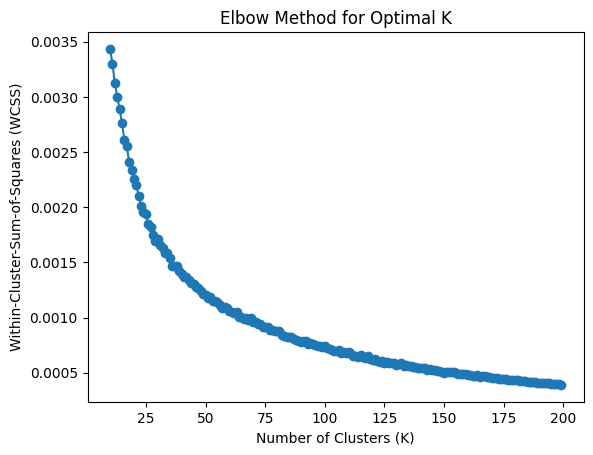

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np


test_sample = test_sample[['위도', '경도']].dropna()

k_values = range(10,200)

# 각 K에 대한 KMeans 모델을 훈련하고 WCSS 값을 저장
wcss_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(test_sample)
    wcss_values.append(sum(np.min(cdist(test_sample, kmeans.cluster_centers_, 'euclidean'), axis=1)) / test_sample.shape[0])

# Elbow Method를 시각화
plt.plot(k_values, wcss_values, 'o-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster-Sum-of-Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.show()